In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.decomposition import TruncatedSVD

import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file


In [7]:
23 // 10

2

In [5]:
X, y = load_svmlight_file('input/farm-ads-vect')
X = normalize(X)

svd = TruncatedSVD(random_state=0, n_components=100) # found 
svd.fit(X)

X = svd.transform(X)
X = pd.DataFrame(X)

y = np.array(y)
y[np.where(y == -1)] = 0
CLASS_NAME = 'ad_approved'

X.insert(0, CLASS_NAME, y)

X

,ad_approved,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,1.0,0.063567,0.383626,-0.023690,-0.051386,-0.009948,0.011660,0.000888,-0.004861,-0.082559,...,-0.005661,0.011501,0.004565,-0.019019,0.003408,0.000113,0.005498,-0.012490,0.000791,0.004649
1,0.0,0.440758,-0.083459,-0.048099,-0.068391,0.029851,0.297275,0.044621,-0.289913,-0.058963,...,0.004767,0.005217,0.030610,-0.013227,-0.012526,-0.018423,0.023511,0.007565,-0.014540,-0.021631
2,0.0,0.149160,-0.001945,-0.001312,-0.002923,0.008289,0.045647,0.019124,0.013193,-0.072562,...,-0.031453,0.038559,-0.040220,-0.002623,0.042298,-0.035276,0.004943,-0.072599,0.008505,-0.012127
3,0.0,0.252298,-0.038530,0.063393,0.022464,-0.032243,-0.052956,-0.063817,-0.025958,-0.185941,...,-0.004265,-0.002916,0.008376,-0.005091,-0.005997,-0.003628,0.011928,-0.011176,0.007512,-0.015952
4,0.0,0.084299,0.460828,-0.025034,-0.075582,-0.000894,0.072176,0.011034,-0.011045,-0.141844,...,-0.080412,-0.071015,-0.026315,0.078979,0.004016,-0.013455,-0.013524,0.012049,0.024092,-0.052889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4138,0.0,0.236382,0.028173,0.021541,-0.006873,-0.001095,0.041993,-0.007525,0.181416,-0.085315,...,-0.069022,0.031046,-0.004468,-0.014016,0.014817,-0.057956,0.023581,-0.090237,0.054798,0.036754
4139,1.0,0.318996,-0.050052,-0.005684,-0.005542,0.030570,-0.051068,-0.008552,0.035725,-0.027578,...,0.070586,-0.073375,0.124557,0.112285,-0.057400,-0.242744,-0.021342,0.069416,0.063610,0.012856
4140,1.0,0.316086,-0.018329,-0.014307,-0.045725,0.016738,-0.135161,-0.006809,-0.018668,-0.013932,...,0.003294,0.024383,0.009542,-0.019471,0.027069,0.010222,-0.007441,0.006728,-0.001327,-0.012743
4141,0.0,0.218130,-0.034719,0.016712,-0.015656,0.008927,-0.021781,0.032713,0.064075,-0.014378,...,0.040703,0.020869,-0.009773,0.009249,-0.041661,-0.008855,-0.057134,0.015195,-0.027282,0.008986


In [2]:
from sklearn.datasets import load_svmlight_file
#https://archive.ics.uci.edu/ml/datasets/Farm+Ads
#data = pd.read_csv('input/farm-ads-vect')
X, y = load_svmlight_file('input/farm-ads-vect')

In [5]:
X

<4143x54877 sparse matrix of type '<class 'numpy.float64'>'
	with 817141 stored elements in Compressed Sparse Row format>

In [6]:
X = normalize(X)

In [7]:
X

<4143x54877 sparse matrix of type '<class 'numpy.float64'>'
	with 817141 stored elements in Compressed Sparse Row format>

In [30]:
svd = TruncatedSVD(random_state=0, n_components=4143)
svd.fit(X)

TruncatedSVD(algorithm='randomized', n_components=4143, n_iter=5,
             random_state=0, tol=0.0)

In [31]:
print(svd.explained_variance_ratio_.sum())

0.9999999999999997


In [42]:
results = pd.DataFrame(svd.explained_variance_ratio_).reset_index()
results.columns = ['svd_component_n', 'explained_variance_ratio']
results.to_csv('farm_ads_svd_explained_variance')

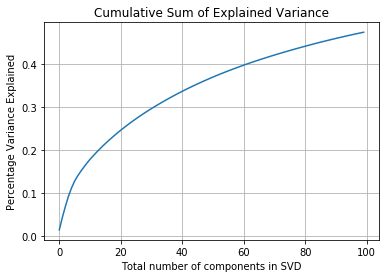

In [8]:
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.ylabel('Percentage Variance Explained')
plt.xlabel('Total number of components in SVD')
plt.grid()
plt.title('Cumulative Sum of Explained Variance')
plt.savefig('cumsum_svd_ads_explained_variance')

In [15]:
pd.read_csv('farm_ads_svd_explained_variance.csv').iloc[0:499, 2].cumsum()

0      0.013481
1      0.042730
2      0.068649
3      0.092387
4      0.111588
         ...   
494    0.734627
495    0.734985
496    0.735342
497    0.735699
498    0.736056
Name: explained_variance_ratio, Length: 499, dtype: float64

In [18]:
X_svd = svd.transform(X)

In [21]:
pd.DataFrame(X_svd)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.063567,0.383626,-0.023690,-0.051386,-0.009948,0.011660,0.000888,-0.004861,-0.082559,-0.111702,...,-0.005661,0.011501,0.004565,-0.019019,0.003408,0.000113,0.005498,-0.012490,0.000791,0.004649
1,0.440758,-0.083459,-0.048099,-0.068391,0.029851,0.297275,0.044621,-0.289913,-0.058963,0.039436,...,0.004767,0.005217,0.030610,-0.013227,-0.012526,-0.018423,0.023511,0.007565,-0.014540,-0.021631
2,0.149160,-0.001945,-0.001312,-0.002923,0.008289,0.045647,0.019124,0.013193,-0.072562,0.053180,...,-0.031453,0.038559,-0.040220,-0.002623,0.042298,-0.035276,0.004943,-0.072599,0.008505,-0.012127
3,0.252298,-0.038530,0.063393,0.022464,-0.032243,-0.052956,-0.063817,-0.025958,-0.185941,0.257194,...,-0.004265,-0.002916,0.008376,-0.005091,-0.005997,-0.003628,0.011928,-0.011176,0.007512,-0.015952
4,0.084299,0.460828,-0.025034,-0.075582,-0.000894,0.072176,0.011034,-0.011045,-0.141844,-0.138897,...,-0.080412,-0.071015,-0.026315,0.078979,0.004016,-0.013455,-0.013524,0.012049,0.024092,-0.052889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4138,0.236382,0.028173,0.021541,-0.006873,-0.001095,0.041993,-0.007525,0.181416,-0.085315,0.048955,...,-0.069022,0.031046,-0.004468,-0.014016,0.014817,-0.057956,0.023581,-0.090237,0.054798,0.036754
4139,0.318996,-0.050052,-0.005684,-0.005542,0.030570,-0.051068,-0.008552,0.035725,-0.027578,0.052261,...,0.070586,-0.073375,0.124557,0.112285,-0.057400,-0.242744,-0.021342,0.069416,0.063610,0.012856
4140,0.316086,-0.018329,-0.014307,-0.045725,0.016738,-0.135161,-0.006809,-0.018668,-0.013932,0.022682,...,0.003294,0.024383,0.009542,-0.019471,0.027069,0.010222,-0.007441,0.006728,-0.001327,-0.012743
4141,0.218130,-0.034719,0.016712,-0.015656,0.008927,-0.021781,0.032713,0.064075,-0.014378,0.031795,...,0.040703,0.020869,-0.009773,0.009249,-0.041661,-0.008855,-0.057134,0.015195,-0.027282,0.008986


In [10]:
sparse_pca = SparsePCA(random_state=0)
sparse_pca.fit(X)

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [7]:
X = pd.DataFrame(X.todense())
#X = X.sample(frac=0.1, random_state = 1)
X

,0,1,2,3,4,5,6,7,8,9,...,54867,54868,54869,54870,54871,54872,54873,54874,54875,54876
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
y.iloc(X.index)

In [8]:
y = pd.Series(y)
y

0       1.0
1      -1.0
2      -1.0
3      -1.0
4      -1.0
       ... 
4138   -1.0
4139    1.0
4140    1.0
4141   -1.0
4142    1.0
Length: 4143, dtype: float64

In [9]:
X['y'] = y
X

,0,1,2,3,4,5,6,7,8,9,...,54868,54869,54870,54871,54872,54873,54874,54875,54876,y
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
4139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0


In [ ]:
X = X.sample(n=5000, random_state = 1)
X

In [10]:
X['y'] = y
X

,y,0,1,2,3,4,5,6,7,8,...,54867,54868,54869,54870,54871,54872,54873,54874,54875,54876
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4138,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4139,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4140,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4141,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [12]:
train = X.sample(frac = 0.75)
test = X.drop(train.index)

In [14]:
X_train = train.drop(columns=['y'])
y_train = train.y

In [13]:
from sklearn.decomposition import PCA
pca = PCA()

In [ ]:
pca.fit(X_train)

In [6]:
from sklearn.preprocessing import StandardScaler

X_standardized = StandardScaler().fit_transform(X_dense)
X_standardized

array([[ 6.43583716e+01,  6.43583716e+01,  3.71483512e+01, ...,
        -1.55379941e-02, -1.55379941e-02, -1.55379941e-02],
       [-1.55379941e-02, -1.55379941e-02, -2.69190951e-02, ...,
        -1.55379941e-02, -1.55379941e-02, -1.55379941e-02],
       [-1.55379941e-02, -1.55379941e-02, -2.69190951e-02, ...,
        -1.55379941e-02, -1.55379941e-02, -1.55379941e-02],
       ...,
       [-1.55379941e-02, -1.55379941e-02, -2.69190951e-02, ...,
        -1.55379941e-02, -1.55379941e-02, -1.55379941e-02],
       [-1.55379941e-02, -1.55379941e-02, -2.69190951e-02, ...,
         6.43583716e+01,  6.43583716e+01,  6.43583716e+01],
       [-1.55379941e-02, -1.55379941e-02, -2.69190951e-02, ...,
        -1.55379941e-02, -1.55379941e-02, -1.55379941e-02]])

In [54]:
data = pd.read_csv('input/car.data', header = None)
#.columns = ['b', 'm', 'd', 'p', 'l', 's', 'y']
data

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [34]:
data = pd.read_csv('input/bank-additional-full.csv', sep=';')
data[data.poutcome == 'success'].y.value_counts()

yes    894
no     479
Name: y, dtype: int64

In [44]:
data[(data.poutcome == '') | (data.poutcome == 'success')].y.value_counts()

no     32901
yes     4035
Name: y, dtype: int64

In [23]:
data = pd.read_csv('input/breast_cancer.csv')
data.insert(0, 'is_malignent', None)
data.loc[data.diagnosis == 'M', 'is_malignent'] = 1
data.loc[data.diagnosis == 'B', 'is_malignent'] = 0
data.drop(columns = ['id', 'diagnosis', 'Unnamed: 32'], inplace = True)


is_malignent                 int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [13]:
data[data.diagnosis == 'M']['diagnosis'] = 1

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
data.loc[data.diagnosis == 'M', 'diagnosis'] = 1
data.loc[data.diagnosis == 'B', 'diagnosis'] = 0
data.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64